# EXPLORING WEATHER TRENDS 

### Extracting Data From Databases
#### SQL Queries used:
#### 1) Extracting Global data:
####     SELECT * FROM global_data
#### 2) Extracting Data of Cities:
####     SELECT year, avg_temp FROM city_data WHERE city = 'Boston'
####     SELECT year, avg_temp FROM city_data WHERE city = 'New York'
####     SELECT year, avg_temp FROM city_data WHERE city = 'Chicago'
####     SELECT year, avg_temp FROM city_data WHERE city = 'Dallas'

In [21]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

In [22]:
# import datasets 
Boston_temp = pd.read_csv('Boston_temp_data.csv')
Global_temp = pd.read_csv('Global_temp_data.csv')
# read Boston dataset
Boston_temp.head(10)

,year,avg_temp
0,1743,1.19
1,1744,9.63
2,1745,-1.37
3,1746,NaN
4,1747,NaN
5,1748,NaN
6,1749,NaN
7,1750,7.88
8,1751,8.60
9,1752,0.36


In [23]:
# read Global Tempreture Data 
Global_temp.head(10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


#### Global tempretures are available from 1750, and Boston tempretures are available from 1743.

#### In Boston tempretures are there are null values for 1746, 1747, 1748, 1749 and 1780. In this we will need the tempreture in year 1780 for comparison with Global tempretures. 

In [24]:
# Filling in null values in Boston_temp dataset by interpolating 
Boston_temp['interpolate'] = Boston_temp['avg_temp'].interpolate()
Boston_temp.isna().sum()

year           0
avg_temp       5
interpolate    0
dtype: int64

In [25]:
# Calculating Moving averages for Boston Tempretures
Boston_temp['Boston_MA7'] = Boston_temp['interpolate'].rolling(7).mean()
Boston_temp['Boston_MA10'] = Boston_temp['interpolate'].rolling(10).mean()
Boston_temp['Boston_MA50'] = Boston_temp['interpolate'].rolling(50).mean()
Boston_temp.head(30)

,year,avg_temp,interpolate,Boston_MA7,Boston_MA10,Boston_MA50
0,1743,1.19,1.19,NaN,NaN,NaN
1,1744,9.63,9.63,NaN,NaN,NaN
2,1745,-1.37,-1.37,NaN,NaN,NaN
3,1746,NaN,0.48,NaN,NaN,NaN
4,1747,NaN,2.33,NaN,NaN,NaN
5,1748,NaN,4.18,NaN,NaN,NaN
6,1749,NaN,6.03,3.210000,NaN,NaN
7,1750,7.88,7.88,4.165714,NaN,NaN
8,1751,8.60,8.60,4.018571,NaN,NaN
9,1752,0.36,0.36,4.265714,3.931,NaN


In [26]:
# Calculating Moving Averages fro Global Tempretures 
Global_temp['Global_MA7'] = Global_temp['avg_temp'].rolling(7).mean()
Global_temp['Global_MA10'] = Global_temp['avg_temp'].rolling(10).mean()
Global_temp['Global_MA50'] = Global_temp['avg_temp'].rolling(50).mean()
Global_temp.head(30)

,year,avg_temp,Global_MA7,Global_MA10,Global_MA50
0,1750,8.72,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN
4,1754,8.47,NaN,NaN,NaN
5,1755,8.36,NaN,NaN,NaN
6,1756,8.85,8.078571,NaN,NaN
7,1757,9.02,8.121429,NaN,NaN
8,1758,6.74,7.944286,NaN,NaN
9,1759,7.99,8.260000,8.030,NaN


In [27]:
# Removing values in Boston tempreture from 1743 to 1749
Boston_temp_new = Boston_temp[(Boston_temp['year']>1749)]
Global_temp_new = Global_temp[(Global_temp['year']<2014)]

#### Basic Statistics 

In [28]:
Boston_temp_new.describe()

,year,avg_temp,interpolate,Boston_MA7,Boston_MA10,Boston_MA50
count,264.000000,263.000000,264.000000,264.000000,262.000000,222.000000
mean,1881.500000,7.303764,7.286136,7.217013,7.208378,7.204987
std,76.354437,1.156479,1.189283,0.826670,0.778408,0.506654
min,1750.000000,-2.310000,-2.310000,4.018571,3.931000,6.021600
25%,1815.750000,6.805000,6.800000,6.780357,6.793500,6.801650
50%,1881.500000,7.360000,7.355000,7.250000,7.228500,7.016200
75%,1947.250000,7.910000,7.910000,7.770357,7.751000,7.772550
max,2013.000000,10.380000,10.380000,9.157143,9.023000,8.237800


In [29]:
Global_temp_new.describe()

,year,avg_temp,Global_MA7,Global_MA10,Global_MA50
count,264.000000,264.000000,258.000000,255.000000,215.000000
mean,1881.500000,8.359394,8.350781,8.344286,8.286762
std,76.354437,0.575184,0.462115,0.440769,0.309308
min,1750.000000,5.780000,7.191429,7.203000,7.810600
25%,1815.750000,8.077500,8.056071,8.053000,8.046400
50%,1881.500000,8.365000,8.303571,8.274000,8.203600
75%,1947.250000,8.700000,8.627500,8.636500,8.556200
max,2013.000000,9.730000,9.588571,9.556000,9.037600


#### We cna observe from the stats above:
##### 1) average temperature for Boston over the years is less than Global average temperature in all these years
##### 2) Boston has larger range of temperatures than the Global temperatures 

#### Plotting Line plots for Boston and Global Tempretures for comparison for different moving averages 

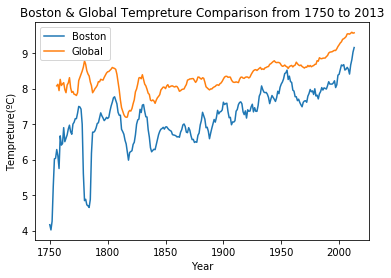

In [30]:
# Line plots for 7 year Moving Averages
plt.plot(Boston_temp_new['year'], Boston_temp_new['Boston_MA7'], label='Boston')
plt.plot(Global_temp_new['year'], Global_temp_new['Global_MA7'], label='Global')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Tempreture(ºC)")
plt.title("Boston & Global Tempreture Comparison from 1750 to 2013")
plt.show()

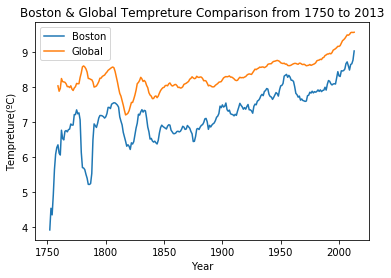

In [31]:
# Line plots for 10 year Moving Averages
plt.plot(Boston_temp_new['year'], Boston_temp_new['Boston_MA10'], label='Boston')
plt.plot(Global_temp_new['year'], Global_temp_new['Global_MA10'], label='Global')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Tempreture(ºC)")
plt.title("Boston & Global Tempreture Comparison from 1750 to 2013")
plt.show()

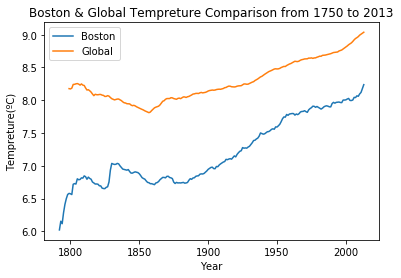

In [32]:
# Line plots for 50 year Moving Averages
plt.plot(Boston_temp_new['year'], Boston_temp_new['Boston_MA50'], label='Boston')
plt.plot(Global_temp_new['year'], Global_temp_new['Global_MA50'], label='Global')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Tempreture(ºC)")
plt.title("Boston & Global Tempreture Comparison from 1750 to 2013")
plt.show()

## Observations:
#### Above three graphs attempts to compare average tempreture fluctuations in Boston over the years with Global tempreture fluctuations for different Moving Average Values. We can make following Observations based on the these.

#### 1) Boston is cooler on average compared to the global average
#### 2) The difference between average tempretures between global and Boston tempretures chages is constant.
#### 3) Both global tempreture and tempreture in Boston is increasing each year, and the difference between tempretures seems to be closing in with a slow rate.        
#### 4) if we observe the trend of tempreture changes over the years, global tempreture is increasig. Rate of increase in average tempreture for Boston is slightly more than rate of change in Globalaverage tempreture over the years.

In [33]:
# importing new datasets for New York, Dallas and Chicago 
NewYork_temp = pd.read_csv('NewYork.csv')
Dallas_temp = pd.read_csv('Dallas.csv')
Chicago_temp = pd.read_csv('Chicago.csv')

In [34]:
# Checking for null values in New York dataset and filling those values with interpolation
NewYork_temp['interpolate'] = NewYork_temp['avg_temp'].interpolate()
NewYork_temp.isna().sum()

year           0
avg_temp       5
interpolate    0
dtype: int64

In [35]:
# Checking for null values in Chicago dataset and filling those values by interpolation
Chicago_temp['interpolate'] = Chicago_temp['avg_temp'].interpolate()
Chicago_temp.isna().sum()

year           0
avg_temp       4
interpolate    0
dtype: int64

In [36]:
#Checking for null values in Dallas dataset
Dallas_temp.isna().sum()
# there are no null values present in the Dallas dataset

year        0
avg_temp    0
dtype: int64

In [37]:
NewYork_temp_new = NewYork_temp[(NewYork_temp['year']>1749)]
NewYork_temp_new['NewYork_MA50'] = NewYork_temp_new['interpolate'].rolling(50).mean()
NewYork_temp_new

C:\Users\avdho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,avg_temp,interpolate,NewYork_MA50
7,1750,10.07,10.07,NaN
8,1751,10.79,10.79,NaN
9,1752,2.81,2.81,NaN
10,1753,9.52,9.52,NaN
11,1754,9.88,9.88,NaN
...,...,...,...,...
266,2009,10.14,10.14,10.1624
267,2010,11.36,11.36,10.1944
268,2011,11.27,11.27,10.2192
269,2012,11.97,11.97,10.2722


In [38]:
Dallas_temp['Dallas_MA50'] = Dallas_temp['avg_temp'].rolling(50).mean()
Dallas_temp

,year,avg_temp,Dallas_MA50
0,1820,16.88,NaN
1,1821,17.33,NaN
2,1822,17.87,NaN
3,1823,17.46,NaN
4,1824,17.90,NaN
...,...,...,...
189,2009,18.42,18.3236
190,2010,18.69,18.3432
191,2011,19.69,18.3834
192,2012,19.99,18.4168


In [39]:
Chicago_temp_new = Chicago_temp[(Chicago_temp['year']>1749)]
Chicago_temp_new['Chicago_MA50'] = Chicago_temp_new['interpolate'].rolling(50).mean()
Chicago_temp_new

C:\Users\avdho\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,avg_temp,interpolate,Chicago_MA50
7,1750,10.49,10.49,NaN
8,1751,11.19,11.19,NaN
9,1752,4.50,4.50,NaN
10,1753,10.04,10.04,NaN
11,1754,10.64,10.64,NaN
...,...,...,...,...
266,2009,10.30,10.30,10.6102
267,2010,11.82,11.82,10.6444
268,2011,11.21,11.21,10.6570
269,2012,12.82,12.82,10.7136


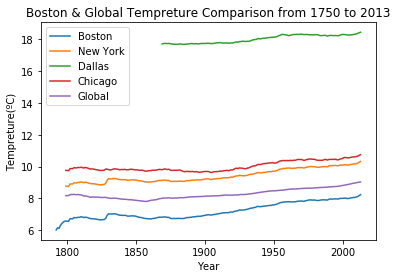

In [40]:
# Line plots for 50 year Moving Averages
plt.plot(Boston_temp_new['year'], Boston_temp_new['Boston_MA50'], label='Boston')
plt.plot(NewYork_temp_new['year'], NewYork_temp_new['NewYork_MA50'], label='New York')
plt.plot(Dallas_temp['year'], Dallas_temp['Dallas_MA50'], label='Dallas')
plt.plot(Chicago_temp_new['year'], Chicago_temp_new['Chicago_MA50'], label='Chicago')
plt.plot(Global_temp_new['year'], Global_temp_new['Global_MA50'], label='Global')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Tempreture(ºC)")
plt.title("Boston & Global Tempreture Comparison from 1750 to 2013")
plt.show()

### Observations:
#### 1) Compared to Global temperatures over the years, temperatures in New York, Chicago and Dallas are more onan average only Boston's temperature seems to be less than Global temperature
#### 2) We can say that New York, Chicago and Dallas are surely hotter than Boston
#### 3) Temperatures of Boston and New York do not have much difference between them,on the other hand, Dallas has highest temperatures in all
#### 4) Overall trend of Global temperatures and temperatures of other cities is increasing every year.